In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
file_path = '../Data/cleaned_household_power_consumption.csv'
df = pd.read_csv(file_path, index_col='Datetime', parse_dates=True)
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [6]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [15]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")


In [17]:
print("Linear Regression Results:")
evaluate(y_test, y_pred_lr)

print("\nRandom Forest Results:")
evaluate(y_test, y_pred_rf)


Linear Regression Results:
MAE: 0.0239
RMSE: 0.0392
R²: 0.9980

Random Forest Results:
MAE: 0.0222
RMSE: 0.0349
R²: 0.9984


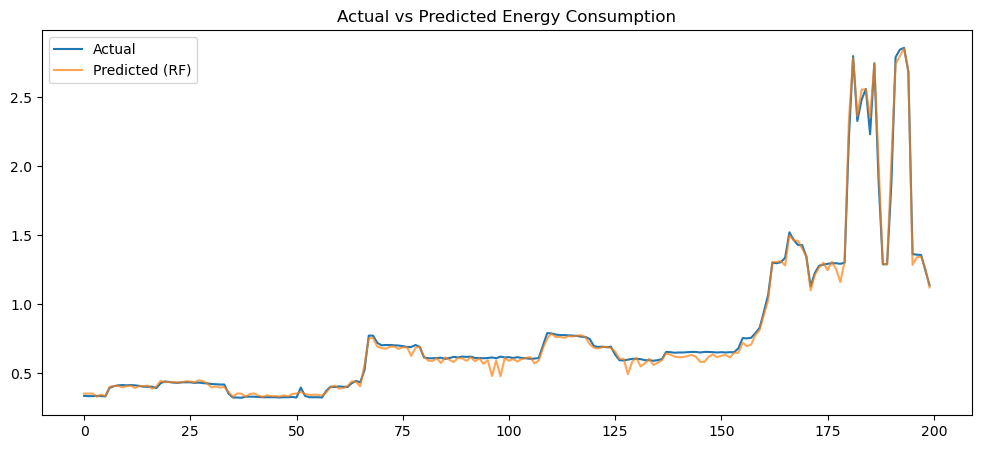

In [19]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred_rf[:200], label='Predicted (RF)', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Energy Consumption')
plt.show()
